# The Winding Number and the SSH model
### Christina Lee
### Category: Graduate
### Topological Physics Series
* [Quantum Anomolous Hall Effect and the Chern Number](../Graduate/Chern-Number.ipynb)
* [SSH Model and the Winding Number](../Graduate/Winding-Number.ipynb)

The Chern number isn't the only topological invariant.  We have multiple invariants, each convenient in their own situations.  The Chern number just happened to appear in one of the biggest, early examples, the Integer Quantum Hall Effect, but the winding number actually occurs much more often in a wider variety of circumstances.

How many times does the phase wrap as we transverse a closed loop?
$$
n = \frac{1}{2 \pi i } \oint \text{d}\phi =
\frac{1}{2\pi i } \oint \frac{\text{d}z}{z}
$$

This expression shows up in complex analysis with <i>Residues</i> and [the Cauchy Integral Formula](https://en.wikipedia.org/wiki/Cauchy%27s_integral_formula), but we're interested in applying this formula to topology.

## Topology and Homotopy

<b>Topology</b> is a general umbrella term for studying properties independent of deformation or coordinate systems.  If we go back to "what does topology formally mean?", it's a structure we can put on sets.  From there, we have a variety of different ways to study that structure, and one of those is <b>Homotopy</b>.

<b>Homotopy</b> considers two functions and asks whether or not they can be deformed into each other.  

Here's a simple example:

We have positions $\vec{x}(t)$ over time with a fixed starting and stopping point.  And we have some fixed puncture point in space our function can never occupy.  We can classify all the possible paths by the number of times they go around the puncture point.

![homotopy shapes](../images/SSH/homotopy.svg)

The domain in our situation is the unit circle $k$, and we want to know what the range looks like in terms of unit circles:
* Zero unit circles= a point?
* One Unit Circle?
* A Unit Circle followed by another Unit Circle?
* A Unit Circle, but flipped and traveled in the opposite direction?

Each of these is a different homotopy class.  

## Su-Schrieffer-Heeger Model for Trans-polyacetylene

The Su-Schrieffer-Heeger Model for Trans-Polyacetylene hosts topological phases characterized by the winding number.

The chemical under doping has high electrical conductivity, opened the entire field of conductive polymers, and led to the 2000 Chemistry Nobel Prize [3].  To get to the model, we first need to look at the chemical structure,

![trans-polyacetylene](../images/SSH/chemstruct.png)

Scary Organic Chemistry stuff... and due to my lack of understand Organic Chemistry stuff, I actually understood the physical situation wrong for a while, but now let me take a crack at explaining what I think is actually the case.  

Though just the plain <i>positions</i> of the atoms are translationally symmetric with a period of one, due to [Pereils instability in 1D](https://en.wikipedia.org/wiki/Peierls_transition) the bonds break into having a translational period of <b>2</b>.  This gives a degeneracy in the ground state.  The way the structure is tiled with "single-bond"--"double-bond" could just be shifted by one site, giving an equally viable chemical structure.  

Now we have regions of uniform tiling and boundaries between them.  The boundaries then act like solitons with certain transitions probabilities to move around.  We are looking at the Hamiltonian that describes how this boundary soliton moves.

All we really need to know is we have a particle free to move in one dimension, with different transition probabilities depending on the type of bond.  For the technical history, see [4], [5], [6]. [6] makes the most sense.

![just hopping in 1D](../images/SSH/ssh_hopping.svg)
$v$ and $w$ are our two transition probabilities, and we also have two different types of sites, $a$ and $b$. We can write down a hopping Hamiltonian from this information,
\begin{equation}
\mathcal{H}= v \sum_i \left(a_i^{\dagger} b_i + \text{h.c.} \right)
-w \sum_i \left(b_i^{\dagger} a_{i+1} + \text{h.c.} \right)
\end{equation}

We can Fourier transform the Hamiltonian,
\begin{equation}
\mathcal{\tilde{H}}= \sum_k v \left( a_k^{\dagger} b_k + b_k a_k^{\dagger} \right) 
- w \left( e^{-i k}  b_k^{\dagger} a_k + e^{i k} a_k^{\dagger} b_k \right) 
\end{equation}
and change forms
\begin{equation}
= \sum_k  \left(v -w \cos k \right) \left( b_k^{\dagger} a_k + a_k^{\dagger} b_k \right)
-i w \sin k \left( - b_k^{\dagger} a_k + a_k^{\dagger} b_k \right)
\end{equation}
\begin{equation}
=\begin{bmatrix}
a_k^{\dagger} & b_k^{\dagger}
\end{bmatrix}
\begin{bmatrix}
0 & \left(v-w \cos k\right) -i \left( -w \sin k \right) \\
\left(v-w \cos k\right) + i \left( -w \sin k \right) & 0 \\
\end{bmatrix}
\begin{bmatrix}
a_k \\ b_k
\end{bmatrix}
\end{equation}
to something where we can read off a quite useful form for this type of topological stuff:
\begin{equation}
\mathcal{\tilde{H}} = \vec{R} \cdot \vec{\sigma}
\end{equation}

\begin{equation}
R_x(k) = v - w \cos k \qquad \qquad R_y (k) = -w \sin k \qquad \qquad R_z = 0
\end{equation}


## Code up the Model

In [1]:
# Adding the Packages
using Plots
using LinearAlgebra
gr()

Plots.GRBackend()

In [2]:
# Pauli Matrices
σx=[[0 1]
    [1 0]]
σy=[[0 -im]
    [im 0]]
σz=[[1 0]
    [0 -1]]

2×2 Array{Int64,2}:
 1   0
 0  -1

In [3]:
# Functions
Rx(k::Float64,v=1,w=2)=v-w*cos(k)
Ry(k::Float64,v=1,w=2)=-w*sin(k)

R(k::Float64,v=1,w=2)=sqrt(Rx(k,v,w)^2+Ry(k,v,w)^2)

H(k::Float64,v=1,w=2)=Rx(k,v,w)*σx+Ry(k,v,w)*σy

H (generic function with 3 methods)

In [4]:
# domain we will calculate on
l=314

ks=range(-π,stop=π,length=l)
dk=ks[2]-ks[1]

0.02007407446383258

### Chiral Symmetry

A Hamiltonian is said to possess chiral symmetry if there exists a $U$ such that
$$
U H U^{-1} = -H  \qquad \qquad U U^{\dagger} =\mathbb{1}.
$$
Finding if $U$ even exists and determining its form if it exists is a problem for another time.  Today, multiple places said that $\sigma_z$ works for the SSH model, and we can confirm that it does.  

A little less intellectually satisfying (at least for me), but it works.

We could test that equation analytically on pen and paper, analytically using 'SymPy', or by plugging in random 'k' values a bunch of times and assuming that's good enough.

I'm going the bunch of random k values route. Just keep evaluating the next cell till you're convinced.

<b>Bonus Note:</b>  We only have a situation with a winding number because we have chiral symmetry and have an odd number of dimensions.  If we have no chiral (and no other any other anti-unitary) symmetry, then we could only have the topologically trivial phase. That's why I'm making sure to mention this.  Check out the Periodic Table of Topological Insulators for more information.

In [5]:
k_test=rand()
σz*H(k_test)*σz^(-1)+H(k_test) # Should equal zero

2×2 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

### Homotopically Different Hamiltonians

We want to know if two sets of parameters $c_1=(v_1,w_1)$ and $c_2=(v_2,w_2)$ will describe topologically equivalent systems.  

We are gifted by the fact have some convenient theorems relating the SPT (Symmetry Protected Topological) topology of the phases and band gap closings.

As we change the parameters, we will remain in the same topological phase as long as <b>we don't close the gap</b> or <b>break symmetries</b>.  [2]

The states are in the same phase if they can be <i>smoothly deformed</i> into each other.  In this context, smoothly deformed means connected by local unitary evolution. Nothing drastic is happening to the system.  Closing the gap is considered drastic.  
    
Now we don't have to change the topological phase at a gap closing, but it's only possible there. 

Beforehand doing a lot of calculations and work, if we can identify where band closings occur and regions where parameters can be perturbed and changed without causing band closings, we can reduce the number of things we need to solve later on.

Analytically, we know that the two eigenvalues occur at: (see QAHE post)
$$
R=\pm \sqrt{R_x^2+ R_y^2}
$$
$$
=\pm \sqrt{v^2+w^2 \cos^2 k -2 vw \cos k + w^2 \sin^2 k} 
= \pm \sqrt{v^2 - 2 vw \cos k + w^2}
$$
The difference between the upper and lower band will be at its minimum when $\cos k$ is greatest,$k=0$.
$$
=\pm \sqrt{(v-w)^2}
$$

So when $v=w$, the gap closes.  This $v=w$ line in parameter space could separate two different topological phases.  Now we need to perform some calculations to see if that is they are actually different phases.

To more quickly see which side of the dividing line a parameter set falls on, I'm instead going to write out parameters in terms of $v$ and $d = v-w$.  This way, the sign of $d$ can quickly tell me which phase we are in.

If d is positive, we are in the <b>Purple</b> phase, designated so because that's what I am using for my color scheme. The Purple phase also turns out to be the topological phase, as we will see later.  

When d is negative, we are in the <b>Turquoise</b> phase, again because of my color scheme.  This phase is topologically trivial.

In [6]:
# Parameters chosen to look at
va=[1.0, 0.5,1.0,  0.0,0.5,  0.4,0.6]
da=[0.0, 0.5,-0.5, 0.5,-0.5, 0.2,-0.2]

# w values corresponding to chosen ds
wa=round.(va+da;sigdigits=2) #Floating point error was making it print bad

# how to plot chosen parameters
colors=[colorant"#aa8e39",
    colorant"#592a71",colorant"#4e918f",
    colorant"#310c43",colorant"#226764",
    colorant"#cca7df",colorant"#a0d9d7",
    ]
styles=[:solid,
    :dash,:dash,
    :solid,:solid,
    :dot,:dot]
widths=[10,15,5,15,5,10,3];

## Band diagrams for different parameters

When $d=0$, we have the gold line with zero band-gap.

If $d\neq 0$, then the band gap is not zero.  

If $v$ and $w$ are flipped, the model will look identical in its energy structure.  We can see the two different sets of purple and turquoise lines plotted over each other.  Only when we look at the phase of the wavefunctions can we see that flipping the $v$ and $w$ actually does have quite an influence on the solution.

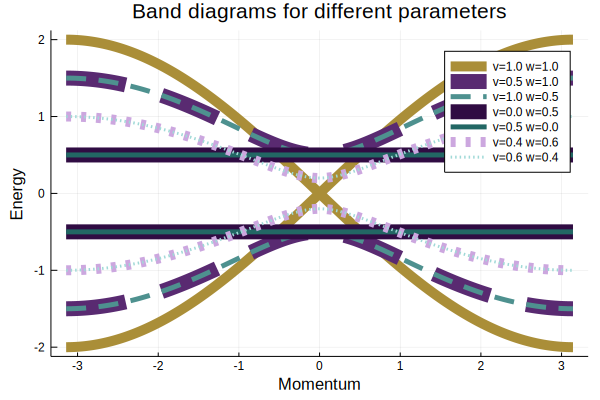

In [7]:
plot()
for ii in 1:length(va)
    plot!(ks,R.(ks,va[ii],wa[ii])
        ,label="v=$(va[ii]) w=$(wa[ii])"
        ,linewidth=widths[ii],color=colors[ii],linestyle=styles[ii])
    
    plot!(ks,-R.(ks,va[ii],wa[ii])
        ,label=""
        ,linewidth=widths[ii],color=colors[ii],linestyle=styles[ii])
end
plot!(title="Band diagrams for different parameters",
xlabel="Momentum",ylabel="Energy")

## Homotopy of Hamiltonian Vector

We can look at <b>either</b> the homotopy of the Hamiltonian <b>or</b> the homotopy of the eigenfunctions. 

Looking at the Hamiltonian seems easier since we don't have to go through the work of calculating the wavefunctions, especially if we have a complicated system, but homotopy is a geometric, almost pictorial thing. How do we go about getting something like that for an operator?  

Let's go back to how we wrote our Hamiltonian down, both this one and the QAHE one before,
$$
\mathcal{H}=\vec{R}(k) \cdot \vec{\sigma}.
$$
Here we have a 1-1 correspondence between the Hamiltonian and a <b>geometric</b> object, this $\vec{R}$ vector.  When we look at how it depends on $k$, we get insight into how $\mathcal{H}$ depends on $k$ as well.

The two different groups, purple and turquoise, will have two different behaviors.  $\vec{R}(k)$ for purple will circle the origin like $S^1$ the unit circle, whereas $\vec{R}(k)$ for turquoise will not circle the origin and will not be like $S^1$.

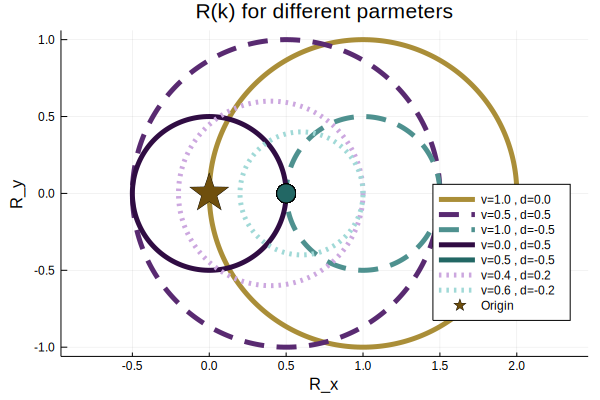

In [8]:
plot()
for ii in 1:length(va)
    plot!(Rx.(ks,va[ii],wa[ii]),
        Ry.(ks,va[ii],wa[ii])
    ,label="v=$(va[ii]) , d=$(da[ii])"
    ,linewidth=5,color=colors[ii],linestyle=styles[ii])
end

statval=5
scatter!(Rx.(ks,va[statval],wa[statval]),Ry.(ks,va[statval],wa[statval])
    ,label="",markersize=10,color=colors[statval])

scatter!([0],[0],label="Origin",
        markersize=20,markershape=:star5,color=colorant"#6f4f0d")

plot!(title="R(k) for different parmeters",
xlabel="R_x", ylabel="R_y",legend=:bottomright,aspect_ratio=1)

## Wavefunction

Going back to what we did in the QAHE post again, we have an analytical expression for the wavefunction:
\begin{equation}
\Psi = \frac{1}{\sqrt{2}}
\begin{bmatrix}
-1\\
\frac{R_x + i R_y}{R}
\end{bmatrix}
\end{equation}

Now that we don't have $R_z$, the magnitudes of both components are constant and uniform. For the first component, the phase also remains constant, but the phase of the second component varies.  It's the behavior of this phase that we will be looking at, and that will determine whether or not the system is topological.

In [9]:
um1=-1/sqrt(2) 

function um2(k::Float64,v=1,w=2)
    return 1/(sqrt(2)*R(k,v,w))*(Rx(k,v,w)+im*Ry(k,v,w))
end

um2 (generic function with 3 methods)

## Plotting the Phase

In plotting the phase for the different parameter combinations, we can really see the differences between the topological phases.  In the turquoise group that didn't encircle zero, the phase changes sinusoidally, going up then back down again, so on and so forth around zero.

But for our purple states $d>0$, the phase just keeps increasing, so we get jumps as we confine it between $-\pi$ and $\pi$. The phase itself is continuous; it just goes across a branch cut which gives us a discontinuity in how we write it down. 


As for the $d=0$ systems, those are both boundary cases with more complicated behavior.

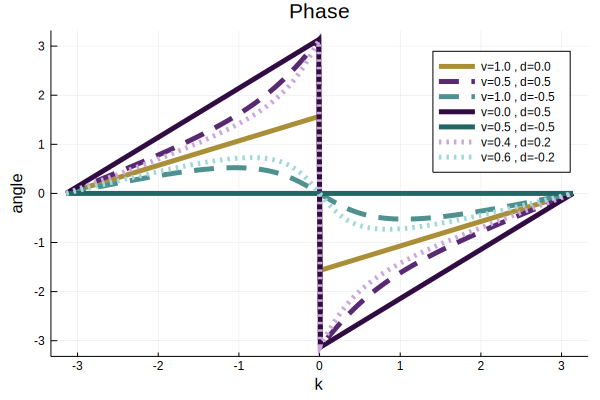

In [10]:
plot()
for ii in 1:length(va)
    plot!(ks,angle.(um2.(ks,va[ii],wa[ii]))
    ,label="v=$(va[ii]) , d=$(da[ii])",linewidth=5
    ,color=colors[ii],linestyle=styles[ii])
end
plot!(title="Phase",xlabel="k",ylabel="angle")

We can look at the effect of our decision of how to take an angle by rotating the system before applying the $-\pi$-$\pi$ boundary.  

If we rotate the system by $\pi/4$ first, the discontinuity in the topological wavefunctions occurs at a different k-location, but it doesn't go away.  This same thing happened in the QAHE Chern number situation.  We can write something different and make a problem area occur in a different spot, but it's still going to occur somewhere.  We can't get rid of the wrapping behavior of the topological systems by any amount of looking at it differently or smooth manipulations.  We can only move the discontinuity that arises from it to a different location.

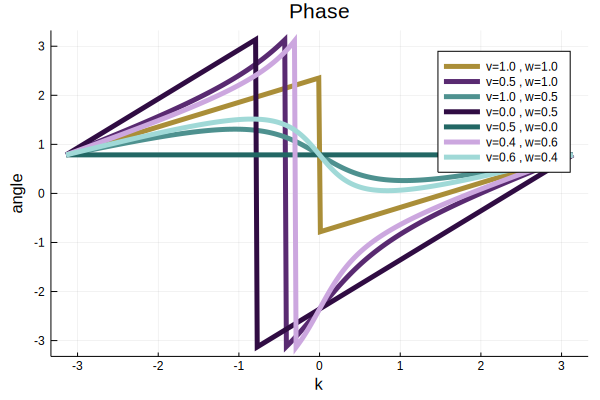

In [11]:
plot()
for ii in 1:length(va)
    plot!(ks,angle.(exp(im*π/4)*um2.(ks,va[ii],wa[ii]))
    ,label="v=$(va[ii]) , w=$(wa[ii])",linewidth=5
    ,color=colors[ii])
end
plot!(title="Phase",xlabel="k",ylabel="angle")

We've qualitatively seen the difference between the phases, but now let's quantitatively look at the difference between the phases. This is as simple integrating the formula in the introduction,
\begin{equation}
n= \oint \frac{\text{d} z}{z}
\end{equation}

In [12]:
function Winding_phi(k,v,w)
    dum2=(um2.(k[2:end],v,w).-um2.(k[1:(end-1)],v,w))
    return 1/(2π*im)*sum(dum2./um2.(k[2:end],v,w) )
end

Winding_phi (generic function with 1 method)

Calculating the winding number specifically for the parameter combinations we've been looking at so far, we can see that the positive phase $d>0$ has a winding number of 1 and the negative phase $d<0$ has a winding number of 0.

In [13]:
println("|Phase \t n \t| d \t v \t w |\t Real \t Imag")
for ii in 1:length(va)
    temp=Winding_phi(ks,va[ii],wa[ii])
    
    println("| ",sign(da[ii]),"\t",round(real(temp),digits=1),"\t|",
        da[ii],"\t",va[ii],"\t",wa[ii],"|\t",
        round(real(temp),digits=5),"\t",round(imag(temp),digits=5))
end

|Phase 	 n 	| d 	 v 	 w |	 Real 	 Imag
| 0.0	0.5	|0.0	1.0	1.0|	0.4968	-0.3208
| 1.0	1.0	|0.5	0.5	1.0|	0.99989	-0.01171
| -1.0	0.0	|-0.5	1.0	0.5|	1.0e-5	-0.00167
| 1.0	1.0	|0.5	0.0	0.5|	0.99993	-0.01004
| -1.0	0.0	|-0.5	0.5	0.0|	0.0	0.0
| 1.0	1.0	|0.2	0.4	0.6|	0.99982	-0.01405
| -1.0	0.0	|-0.2	0.6	0.4|	3.0e-5	-0.00401


But we can also calculate the winding number for the entire grid of parameter values. Here we can much more obviously see how $d=0 \rightarrow v=w$ represents a phase transition between two different topological phases.

In [14]:
vaa=repeat(range(0,stop=1,length=100),1,100)
waa=transpose(vaa)

ϕaa=zeros(Complex{Float64},100,100)
for ii in 1:100
    for jj in 1:100
        ϕaa[ii,jj]=Winding_phi(ks,vaa[ii,jj],waa[ii,jj])
    end
end

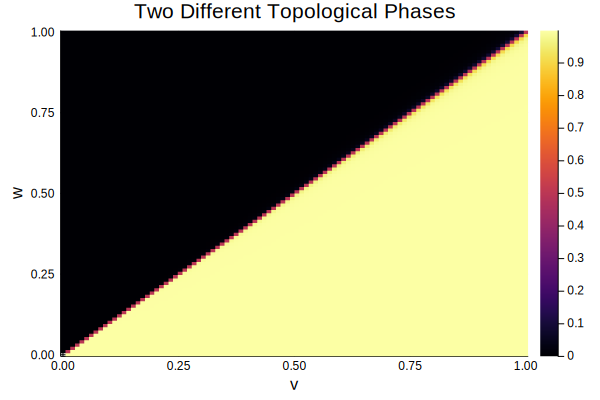

In [15]:
heatmap(vaa[:,1],waa[1,:],real.(ϕaa))
plot!(xlabel="v",ylabel="w", title="Two Different Topological Phases")

## Conclusion

Systems in one dimension with chiral symmetry can host topological phases characterized by the winding number.

The winding behavior appears in both the Hamiltonian and the wavefunctions.

Transitions between topological phases occur at band gap closings.

The Su-Schrieffer-Heeger model exhibits two different topological phases.

[1] Public Domain, https://commons.wikimedia.org/w/index.php?curid=1499462

[2] Chen, Xie, Zheng-Cheng Gu, and Xiao-Gang Wen. "Local unitary transformation, long-range quantum entanglement, wave function renormalization, and topological order." Physical review b 82.15 (2010): 155138. https://arxiv.org/pdf/1004.3835.pdf

[3] https://www.nobelprize.org/prizes/chemistry/2000/popular-information/

[4] Su, W-P_, J. R. Schrieffer, and A. J. Heeger. "Soliton excitations in polyacetylene." Physical Review B 22.4 (1980): 2099.

[5] Heeger, Alan J., et al. "Solitons in conducting polymers." Reviews of Modern Physics 60.3 (1988): 781.

[6] Takayama, Hajime, Yo R. Lin-Liu, and Kazumi Maki. "Continuum model for solitons in polyacetylene." Physical Review B 21.6 (1980): 2388.

[7] Meier, E. J. et al. Observation of the topological soliton state in the Su-Schrieffer-Heeger model. Nat. Commun. 7, 13986 doi: 10.1038/ncomms13986 (2016)

http://paletton.com/#uid=31b0J0kllll8rOUeTt+rNcHBJ42